# Program Sederhana Functional Programming
## Menggabungkan Semua Konsep dengan Pendekatan Sederhana

---

**Konsep yang digunakan:**
- Pure Functions
- Map, Filter, Reduce
- Lambda
- List Comprehension
- Generator Expression
- Closure
- Pandas, NumPy, Matplotlib

---

## 1. Import Library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

## 2. Data Sederhana

In [18]:
# Data penjualan sederhana
data = [
    {"produk": "Laptop", "harga": 10000000, "jumlah": 5, "kategori": "Komputer"},
    {"produk": "Mouse", "harga": 150000, "jumlah": 20, "kategori": "Aksesoris"},
    {"produk": "Keyboard", "harga": 500000, "jumlah": 15, "kategori": "Aksesoris"},
    {"produk": "Monitor", "harga": 3000000, "jumlah": 8, "kategori": "Komputer"},
    {"produk": "Headset", "harga": 800000, "jumlah": 12, "kategori": "Aksesoris"}
]

print(f"Total produk: {len(data)}")

Total produk: 5


## 3. Pure Functions

In [19]:
# Pure function: hitung total revenue
def hitung_revenue(item):
    return item["harga"] * item["jumlah"]

# Test
print(f"Revenue Laptop: Rp {hitung_revenue(data[0]):,}")

Revenue Laptop: Rp 50,000,000


## 4. Map - Transformasi Data

In [20]:
# Map: tambahkan field revenue menggunakan lambda
data_dengan_revenue = list(map(
    lambda item: {**item, "revenue": hitung_revenue(item)},
    data
))

print("Data dengan revenue:")
for item in data_dengan_revenue:
    print(f"  {item['produk']}: Rp {item['revenue']:,}")

Data dengan revenue:
  Laptop: Rp 50,000,000
  Mouse: Rp 3,000,000
  Keyboard: Rp 7,500,000
  Monitor: Rp 24,000,000
  Headset: Rp 9,600,000


## 5. Filter - Seleksi Data

In [21]:
# Filter: ambil produk aksesoris menggunakan lambda
aksesoris = list(filter(lambda item: item["kategori"] == "Aksesoris", data))

print("Produk Aksesoris:")
for item in aksesoris:
    print(f"  - {item['produk']}")

Produk Aksesoris:
  - Mouse
  - Keyboard
  - Headset


## 6. Reduce - Agregasi Data

In [22]:
# Reduce: hitung total omset
total_omset = reduce(
    lambda acc, item: acc + (item["harga"] * item["jumlah"]),
    data,
    0
)

print(f"Total omset: Rp {total_omset:,}")

Total omset: Rp 94,100,000


## 7. List Comprehension

In [23]:
# List comprehension: ambil nama produk aksesoris
nama_aksesoris = [item["produk"] for item in data if item["kategori"] == "Aksesoris"]

# List comprehension: hitung revenue per kategori
kategori_list = list(set(item["kategori"] for item in data))
omset_per_kategori = {
    kategori: sum(item["harga"] * item["jumlah"] 
                  for item in data if item["kategori"] == kategori)
    for kategori in kategori_list
}

print(f"Nama produk aksesoris: {nama_aksesoris}")
print(f"\nOmset per kategori:")
for kategori, omset in omset_per_kategori.items():
    print(f"  {kategori}: Rp {omset:,}")

Nama produk aksesoris: ['Mouse', 'Keyboard', 'Headset']

Omset per kategori:
  Aksesoris: Rp 20,100,000
  Komputer: Rp 74,000,000


## 8. Generator Expression

In [24]:
# Generator expression: generate revenue tanpa menyimpan semua data
revenue_gen = (item["harga"] * item["jumlah"] for item in data)

print("Revenue per produk (dari generator):")
for i, rev in enumerate(revenue_gen, 1):
    print(f"  Produk {i}: Rp {rev:,}")

# Sum dari generator
total_dari_gen = sum(item["harga"] * item["jumlah"] for item in data)
print(f"\nTotal dari generator: Rp {total_dari_gen:,}")

Revenue per produk (dari generator):
  Produk 1: Rp 50,000,000
  Produk 2: Rp 3,000,000
  Produk 3: Rp 7,500,000
  Produk 4: Rp 24,000,000
  Produk 5: Rp 9,600,000

Total dari generator: Rp 94,100,000


## 9. Closure - Factory Function

In [25]:
# Closure: factory function untuk membuat filter harga
def buat_filter_harga(min_harga, max_harga):
    def filter_func(item):
        return min_harga <= item["harga"] <= max_harga
    return filter_func

# Gunakan closure
filter_murah = buat_filter_harga(0, 1000000)
produk_murah = list(filter(filter_murah, data))

print("Produk dengan harga ≤ Rp 1.000.000:")
for item in produk_murah:
    print(f"  - {item['produk']}: Rp {item['harga']:,}")

Produk dengan harga ≤ Rp 1.000.000:
  - Mouse: Rp 150,000
  - Keyboard: Rp 500,000
  - Headset: Rp 800,000


## 10. Pandas - Data Processing

In [26]:
# Konversi ke DataFrame
df = pd.DataFrame(data_dengan_revenue)

print("DataFrame:")
print(df)

# Statistik per kategori
statistik = df.groupby('kategori')['revenue'].sum()
print("\nTotal revenue per kategori:")
print(statistik)

DataFrame:
     produk     harga  jumlah   kategori   revenue
0    Laptop  10000000       5   Komputer  50000000
1     Mouse    150000      20  Aksesoris   3000000
2  Keyboard    500000      15  Aksesoris   7500000
3   Monitor   3000000       8   Komputer  24000000
4   Headset    800000      12  Aksesoris   9600000

Total revenue per kategori:
kategori
Aksesoris    20100000
Komputer     74000000
Name: revenue, dtype: int64


## 11. NumPy - Operasi Numerik

In [27]:
# Konversi ke NumPy array
harga_array = np.array([item['harga'] for item in data])
jumlah_array = np.array([item['jumlah'] for item in data])

# Operasi dengan NumPy
revenue_array = harga_array * jumlah_array
rata_harga = np.mean(harga_array)

print(f"Revenue array: {revenue_array}")
print(f"Rata-rata harga: Rp {rata_harga:,.0f}")
print(f"Total revenue (NumPy): Rp {revenue_array.sum():,}")

Revenue array: [50000000  3000000  7500000 24000000  9600000]
Rata-rata harga: Rp 2,890,000
Total revenue (NumPy): Rp 94,100,000


## 12. Visualisasi dengan Matplotlib

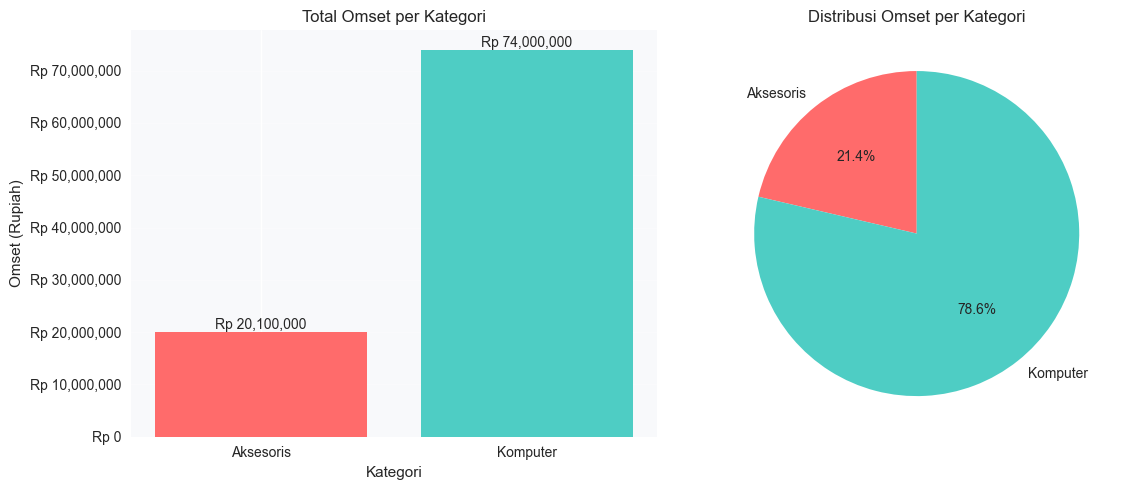

✅ Visualisasi selesai!


In [28]:
# Persiapan data untuk visualisasi
kategori = list(omset_per_kategori.keys())
omset = list(omset_per_kategori.values())

# Buat 2 subplot sederhana
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Bar Chart - Omset per Kategori
ax1.bar(kategori, omset, color=['#FF6B6B', '#4ECDC4'])
ax1.set_title('Total Omset per Kategori')
ax1.set_ylabel('Omset (Rupiah)')
ax1.set_xlabel('Kategori')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'Rp {x:,.0f}'))
ax1.grid(axis='y', alpha=0.3)

# Tambahkan label nilai
for i, v in enumerate(omset):
    ax1.text(i, v, f'Rp {v:,.0f}', ha='center', va='bottom')

# Subplot 2: Pie Chart - Distribusi Kategori
ax2.pie(omset, labels=kategori, autopct='%1.1f%%', startangle=90, 
        colors=['#FF6B6B', '#4ECDC4'])
ax2.set_title('Distribusi Omset per Kategori')

plt.tight_layout()
plt.show()

print("✅ Visualisasi selesai!")

## 13. Ringkasan

In [ ]:
print("=" * 50)
print("RINGKASAN")
print("=" * 50)
print(f"Total produk: {len(data)}")
print(f"Total omset: Rp {total_omset:,}")
print(f"\nOmset per kategori:")
for kategori, omset in omset_per_kategori.items():
    print(f"  {kategori}: Rp {omset:,}")

RINGKASAN
Total produk: 5
Total omset: Rp 94,100,000

Omset per kategori:
  Aksesoris: Rp 20,100,000
  Komputer: Rp 74,000,000

✅ Semua konsep functional programming telah diterapkan!
